In [1]:
import pandas as pd
import nltk
nltk.download("stopwords")
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Meghna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Meghna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Meghna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df = pd.read_csv("IMDB Dataset.csv\IMDB Dataset.csv")
df_copy = pd.DataFrame()
df_copy['Review'] = df['review']
df.head

<bound method NDFrame.head of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [10]:
#PREPROCESSING OF DATA

df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['review'] = df['review'].apply(lambda x: " ".join(re.sub(r'[^\w\s]','',x) for x in x.split()))        
print(df)

                                                  review sentiment
0      one reviewers mentioned watching 1 oz episode ...  positive
1      wonderful little production br br the filming ...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically theres family little boy jake thinks...  negative
4      petter matteis love time money visually stunni...  positive
...                                                  ...       ...
49995  thought movie right good job creative original...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary schools n...  negative
49998  im going disagree previous comment side maltin...  negative
49999  one expects star trek movies high art fans exp...  negative

[50000 rows x 2 columns]


In [11]:
#LEMMATIZATION

lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda x: " ".join(lemmatizer.lemmatize(x) for x in x.split()))
print(df)

                                                  review sentiment
0      one reviewer mentioned watching 1 oz episode h...  positive
1      wonderful little production br br the filming ...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically there family little boy jake think t...  negative
4      petter matteis love time money visually stunni...  positive
...                                                  ...       ...
49995  thought movie right good job creative original...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary school nu...  negative
49998  im going disagree previous comment side maltin...  negative
49999  one expects star trek movie high art fan expec...  negative

[50000 rows x 2 columns]


In [5]:
#STEMMING

#stemmer = PorterStemmer()
#df['review'] = df['review'].apply(lambda x: " ".join(stemmer.stem(x) for x in x.split()))
#print(df)

#We will not use stemming since it produces a lot of words which do not make sense

In [6]:
positive = df[df['sentiment']=='positive']
negative = df[df['sentiment']=='negative']
print(positive)
print(len(negative))

                                                  review sentiment
0      one reviewer mentioned watching 1 oz episode h...  positive
1      wonderful little production br br the filming ...  positive
2      thought wonderful way spend time hot summer we...  positive
4      petter matteis love time money visually stunni...  positive
5      probably alltime favorite movie story selfless...  positive
...                                                  ...       ...
49983  loved it fan original series always wondered b...  positive
49985  imaginary hero clearly best film year complete...  positive
49989  got one week ago love it modern light filled t...  positive
49992  john garfield play marine blinded grenade figh...  positive
49995  thought movie right good job creative original...  positive

[25000 rows x 2 columns]
25000


In [7]:
X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)



In [8]:
#Vectorize
vect = CountVectorizer(min_df=5, ngram_range=(1, 2))
X_train = vect.fit(X_train).transform(X_train)
X_test = vect.transform(X_test)


In [9]:
#Logistic Regression model

lrmodel = LogisticRegression(C =2,max_iter=5000,random_state=0)
lrmodel.fit(X_train, y_train)
lrpredict=lrmodel.predict(X_test)
lraccuracy = accuracy_score(y_test,lrpredict)
print(lraccuracy)



0.8998


In [10]:
#Multinomial Naive Bayes

mnbmodel = MultinomialNB()
mnbmodel.fit(X_train,y_train)
mnbpredict = mnbmodel.predict(X_test)
mnbaccuracy = accuracy_score(y_test,mnbpredict)
print(mnbaccuracy)

0.8826


In [11]:
rfmodel = RandomForestClassifier(max_depth = 8)
rfmodel.fit(X_train, y_train)
rfpredict = rfmodel.predict(X_test)
rfaccuracy = accuracy_score(y_test, rfpredict)
print(rfaccuracy)

0.8265


In [21]:
dtmodel = DecisionTreeClassifier(max_depth=3)
dtmodel.fit(X_train, y_train)
dtpredict = rfmodel.predict(X_test)
dtaccuracy = accuracy_score(y_test, rfpredict)
print(dtaccuracy)

0.8265


[[4505  552]
 [ 450 4493]]


<AxesSubplot:>

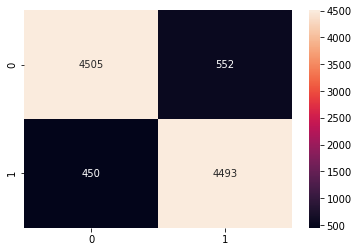

In [13]:
matrix_lr = confusion_matrix(y_test, lrpredict)
print(matrix_lr) 
sns.heatmap(matrix_lr, annot=True, fmt="d")

#plt.show()

[[4444  613]
 [ 561 4382]]


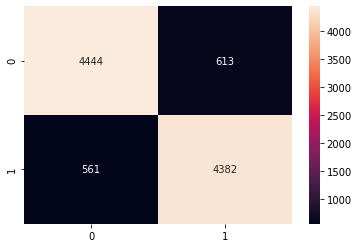

In [14]:
matrix_mnb = confusion_matrix(y_test, mnbpredict)
sns.heatmap(matrix_mnb, annot = True, fmt="d")
print(matrix_mnb)


[[3855 1202]
 [ 533 4410]]


<AxesSubplot:>

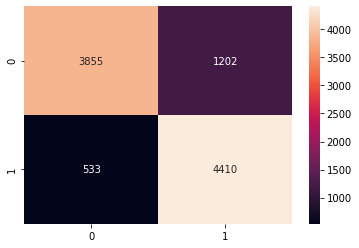

In [15]:
matrix_rf = confusion_matrix(y_test, rfpredict)
print(matrix_rf) 
sns.heatmap(matrix_rf, annot=True, fmt="d")


[[3855 1202]
 [ 533 4410]]


<AxesSubplot:>

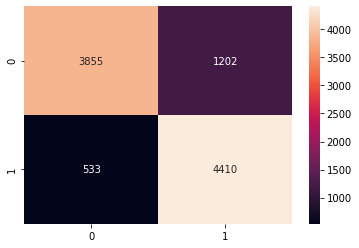

In [22]:
matrix_dt = confusion_matrix(y_test, dtpredict)
print(matrix_dt)
sns.heatmap(matrix_dt, annot = True, fmt="d")

In [23]:
print(classification_report(y_test, lrpredict))
print(classification_report(y_test, mnbpredict))
print(classification_report(y_test, rfpredict))
print(classification_report(y_test, dtpredict))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5057
    positive       0.89      0.91      0.90      4943

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      5057
    positive       0.88      0.89      0.88      4943

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    negative       0.88      0.76      0.82      5057
    positive       0.79      0.89      0.84      4943

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

              preci

In [3]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()
df1= pd.DataFrame()
df1['Review'] = df['review']
df1['Positive'] = [vader.polarity_scores(str(i))['pos'] for i in df['review']]
df1['Negative'] = [vader.polarity_scores(str(i))['neg'] for i in df['review']]
df1['Neutral'] = [vader.polarity_scores(str(i))['neu'] for i in df['review']]
df1['Compound'] = [vader.polarity_scores(str(i))['compound'] for i in df['review']]
print(df1.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Meghna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Review  Positive  Negative  \
0  One of the other reviewers has mentioned that ...     0.048     0.203   
1  A wonderful little production. <br /><br />The...     0.172     0.053   
2  I thought this was a wonderful way to spend ti...     0.192     0.094   
3  Basically there's a family where a little boy ...     0.065     0.138   
4  Petter Mattei's "Love in the Time of Money" is...     0.147     0.052   

   Neutral  Compound  
0    0.748   -0.9951  
1    0.776    0.9641  
2    0.714    0.9605  
3    0.797   -0.9213  
4    0.801    0.9744  


In [6]:
total=[]
for i in df1['Compound']:
    if i >= 0.00 :
        total.append("Positive")
  
    else :
        total.append("Negative")
df1['Overall Sentiment'] = total
print(df1)

                                                  Review  Positive  Negative  \
0      One of the other reviewers has mentioned that ...     0.048     0.203   
1      A wonderful little production. <br /><br />The...     0.172     0.053   
2      I thought this was a wonderful way to spend ti...     0.192     0.094   
3      Basically there's a family where a little boy ...     0.065     0.138   
4      Petter Mattei's "Love in the Time of Money" is...     0.147     0.052   
...                                                  ...       ...       ...   
49995  I thought this movie did a down right good job...     0.199     0.047   
49996  Bad plot, bad dialogue, bad acting, idiotic di...     0.114     0.166   
49997  I am a Catholic taught in parochial elementary...     0.108     0.208   
49998  I'm going to have to disagree with the previou...     0.082     0.105   
49999  No one expects the Star Trek movies to be high...     0.141     0.135   

       Neutral  Compound Overall Sentim

In [12]:
pos_vader = len(df1[df1['Overall Sentiment']=='Positive'])*100/len(df1)
neg_vader = len(df1[df1['Overall Sentiment']=='Negative'])*100/len(df1)

print(pos_vader)
print(neg_vader)

65.984
34.016
